In [1]:
import sys
import yaml
import pathlib
import numpy
import pandas
import matplotlib.pyplot as plt
from monte_carlo_utils import make_bins, get_bin, place_into_bins

In [28]:
input_directory = pathlib.Path(
    '/Users/rmueller/Data/MIDOSS/marine_transport_data/'
)

### open master yaml file for 
with open(input_directory/'master.yaml') as file:
    master = yaml.load(file, Loader=yaml.Loader)

# Get Total number of AIS pings and vessel length by MMSI for
# our different ship types
data = {}
data['count'] = {}
data['length'] = {}
length_bins = {}
for vessel in master['categories']['all_vessels']:
    input_data = pandas.read_excel(
        master['files']['oil_capacity'],
        sheet_name=f'{vessel} data', 
        usecols='B,C'
    )
    data['count'][vessel]  = input_data['COUNT']
    data['length'][vessel] = input_data['LENGTH']
    length_bins[vessel] = {}


In [29]:
length_bins

{'tanker': {},
 'atb': {},
 'barge': {},
 'cargo': {},
 'cruise': {},
 'ferry': {},
 'fishing': {},
 'smallpass': {},
 'other': {}}

In [30]:
# tanker
length_bins['tanker']['lower_bound'] = 0
length_bins['tanker']['upper_bound'] = 300
length_bins['tanker']['step_size']   = 50

# atb
length_bins['atb']['lower_bound'] = 0
length_bins['atb']['upper_bound'] = 300
length_bins['atb']['step_size']   = 50

# barge
length_bins['barge']['lower_bound'] = 0
length_bins['barge']['upper_bound'] = 300
length_bins['barge']['step_size']   = 50

# cargo
length_bins['cargo']['lower_bound'] = 150
length_bins['cargo']['upper_bound'] = 400
length_bins['cargo']['step_size']   = 10

# cruise
length_bins['cargo']['lower_bound'] = 250
length_bins['cargo']['upper_bound'] = 350
length_bins['cargo']['step_size']   = 10

# ferry
length_bins['ferry']['lower_bound'] = 35
length_bins['ferry']['upper_bound'] = 160
length_bins['ferry']['step_size']   = 10

# fishing
length_bins['fishing']['lower_bound'] = 0
length_bins['fishing']['upper_bound'] = 80
length_bins['fishing']['step_size']   = 10

# smallpass
length_bins['smallpass']['lower_bound'] = 0
length_bins['smallpass']['upper_bound'] = 35
length_bins['smallpass']['step_size']   = 5

# other
length_bins['other']['lower_bound'] = 0
length_bins['other']['upper_bound'] = 35
length_bins['other']['step_size']   = 5


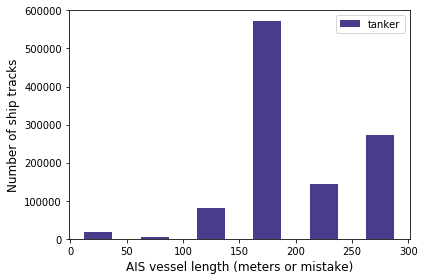

In [24]:
lower_bound = length_bins['tanker']['lower_bound']
upper_bound = length_bins['tanker']['upper_bound']
step_size   = length_bins['tanker']['step_size']

[tanker_bins, tanker_bin_centers]  = make_bins(
    lower_bound,
    upper_bound,
    step_size
)

binned_tanker_length = place_into_bins(
    data['length']['tanker'], 
    data['count']['tanker'], 
    tanker_bins
)

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.bar(
    tanker_bin_centers,
    binned_tanker_length,
    label='tanker',
    width = 50/2,
    color='darkslateblue'
)
plt.xlabel('AIS vessel length (meters or mistake)',fontsize=12)
plt.ylabel('Number of ship tracks',fontsize=12)
plt.tight_layout()
ax1.legend()
plt.show() 

In [ ]:
lower_bound = length_bins['tanker']['lower_bound']
upper_bound = length_bins['tanker']['upper_bound']
step_size   = length_bins['tanker']['step_size']

[tanker_bins, tanker_bin_centers]  = make_bins(
    lower_bound,
    upper_bound,
    step_size
)

binned_tanker_length = place_into_bins(
    data['length']['tanker'], 
    data['count']['tanker'], 
    tanker_bins
)

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.bar(
    tanker_bin_centers,
    binned_tanker_length,
    label='tanker',
    width = 50/2,
    color='darkslateblue'
)
plt.xlabel('AIS vessel length (meters or mistake)',fontsize=12)
plt.ylabel('Number of ship tracks',fontsize=12)
plt.tight_layout()
ax1.legend()
plt.show() 

In [15]:
tanker_bin_centers

[25.0, 75.0, 125.0, 175.0, 225.0, 275.0]